In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm, skew, kurtosis
import seaborn as sns

!pip install openpyxl


In [3]:
# Load data
covariance_matrix = pd.read_excel('covariance_matrix.xlsx', index_col=0)
init_values = pd.read_excel('init_values.xlsx', index_col=0)

# Parameters
mu = np.array([0, 0.07 / 52, 0.06 / 52] + [0] * (len(covariance_matrix) - 3))
sigma = covariance_matrix.values
initial_values = init_values.values.flatten()
np.random.seed(55) 

# Simulation settings
n_steps = 52 # Number of time steps (weekly for 1 year)
n_simulations = 10000 # Number of simulated paths
delta_t = 1 / 52 # Time step size
horizon = 1

# Question 1: Simulation of Market Invariants

Text(0, 0.5, 'Density')

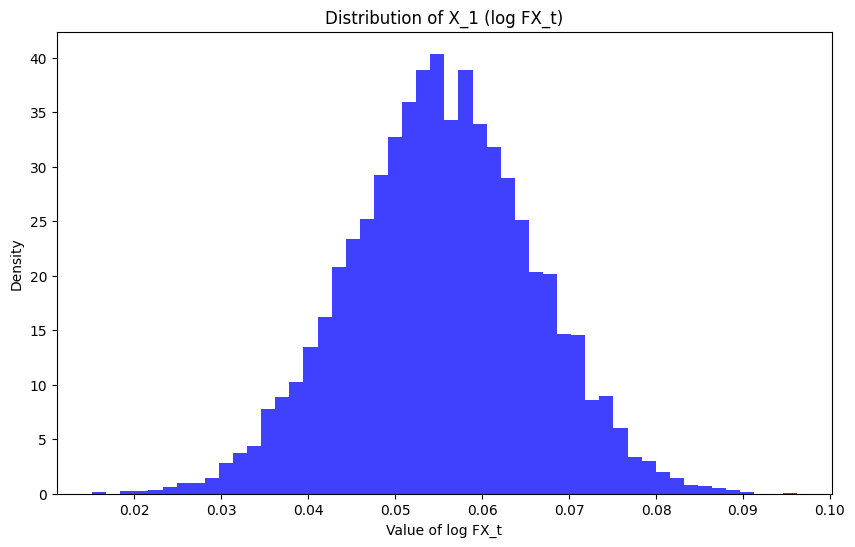

In [4]:
X_t = np.zeros((n_simulations, len(initial_values), n_steps + 1))
X_t[:, :, 0] = initial_values  

# Simulate paths
for t in range(1, n_steps + 1):
    # Simulate weekly increments from N(mu, sigma)
    delta_X_t = np.random.multivariate_normal(mu, sigma, size=n_simulations)
    X_t[:, :, t] = X_t[:, :, t - 1] + delta_X_t

X_1 = X_t[:, :, 1]

# Plot distribution for the first variable in X_1 (log FX_t)
plt.figure(figsize=(10, 6))
plt.hist(X_1[:, 0], bins=50, density=True, alpha=0.75, color='blue')
plt.title("Distribution of X_1 (log FX_t)")
plt.xlabel("Value of log FX_t")
plt.ylabel("Density")

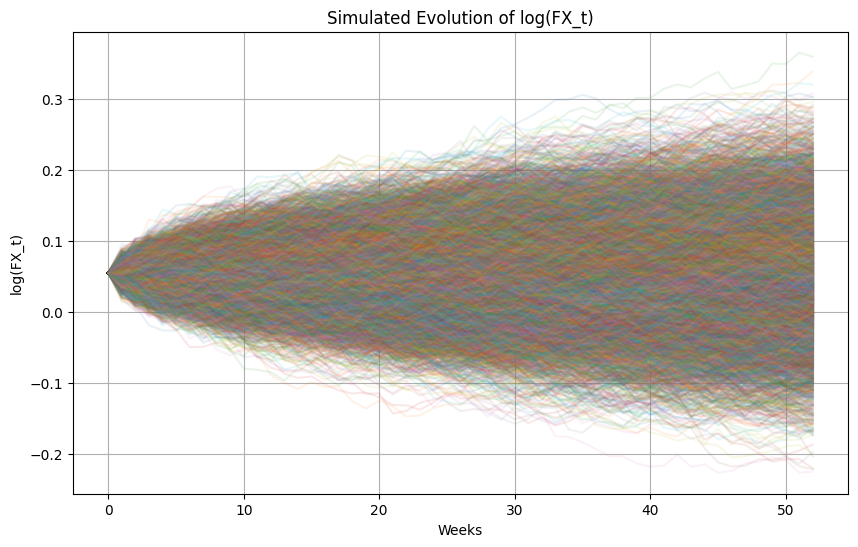

In [5]:
log_FX_t = X_t[:, 0, :]

# Visualization 
plt.figure(figsize=(10, 6))
for i in range(n_simulations):  # Plot 10000 random paths
    plt.plot(range(n_steps + 1), log_FX_t[i, :], alpha=0.1)
plt.title("Simulated Evolution of log(FX_t)")
plt.xlabel("Weeks")
plt.ylabel("log(FX_t)")
plt.grid()
plt.show()


# Question 2: Distribution of V U S,local 1 & Simulation 

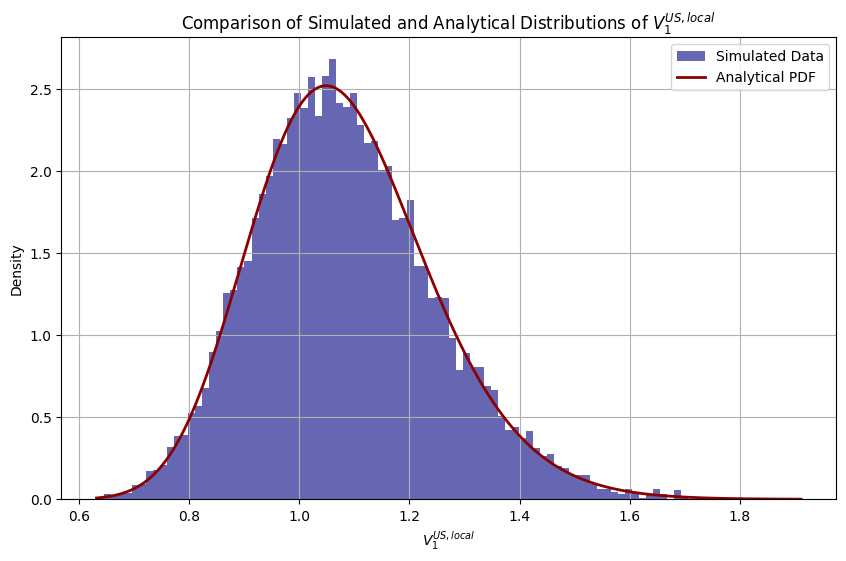

In [6]:
# --- Parametre ---
V0_US_local = np.exp(init_values.loc['EQV US', 'initial values']) 
V0_EUR_local = np.exp(init_values.loc['EQV EUR', 'initial values']) 

# Yearly
mu_log_annual = mu[1] * 52  
sigma_log_annual = np.sqrt(sigma[1, 1] * 52)  


scale = V0_US_local * np.exp(mu_log_annual)  
s = sigma_log_annual  

n_simulations = 10000
log_V_US_local_1_simulated = np.random.normal(loc=mu_log_annual, scale=sigma_log_annual, size=n_simulations)
V_US_local_1_simulated = V0_US_local * np.exp(log_V_US_local_1_simulated)  


x_values = np.linspace(min(V_US_local_1_simulated), max(V_US_local_1_simulated), 1000)  
pdf_values = lognorm.pdf(x_values, s=s, scale=scale)


plt.figure(figsize=(10, 6))
plt.hist(V_US_local_1_simulated, bins=100, density=True, color='navy', alpha=0.6, label='Simulated Data')

# Analytical PDF
plt.plot(x_values, pdf_values, color='darkred', linewidth=2, label='Analytical PDF')


plt.title("Comparison of Simulated and Analytical Distributions of $V_1^{US,local}$")
plt.xlabel("$V_1^{US,local}$")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


# Question 3: Zero-Coupon Bond Pricing 

Zero Coupon Obligation for 5 Year EUR: 0.9046234128748379
Zero Coupon Obligation for 5 Year USD: 0.8294081241634763


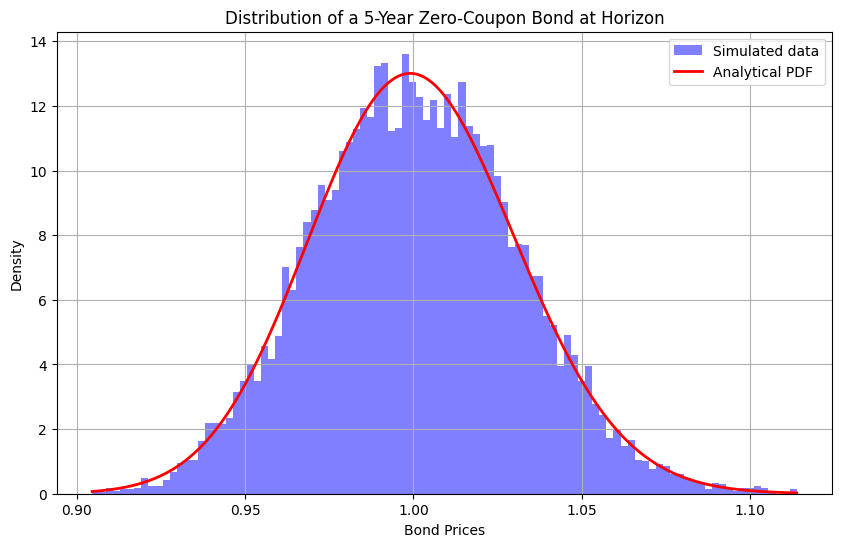

Simulated Mean: 1.0009, Analytical Mean: 1.0005
Simulated Std: 0.0307, Analytical Std: 0.0307


In [ ]:
from scipy.stats import lognorm
import numpy as np
import matplotlib.pyplot as plt

tau = 5  
delta_t = 1 / 52  

# Zero Coupon
y_USD_5Y_0 = init_values.loc['5Y USD', 'initial values']   
y_EUR_5Y_0 = init_values.loc['5Y EUR', 'initial values']   


Z_USD_5Y_local = np.exp(-y_USD_5Y_0 * tau)  
Z_EUR_5Y = np.exp(-y_EUR_5Y_0 * tau)  
print("Zero Coupon Obligation for 5 Year EUR:", Z_EUR_5Y)
print("Zero Coupon Obligation for 5 Year USD:", Z_USD_5Y_local)

mu_y = mu[4]  
sigma_y_weekly = np.sqrt(sigma[6, 6]) 
sigma_y_annual = np.sqrt(sigma[6, 6] * 52)  

mu_log_P = -tau * mu_y  
sigma_log_P = tau * sigma_y_annual  

# Lognormal parameter
scale = np.exp(mu_log_P)  
s = sigma_log_P  

n_simulations = 10000
log_P_simulated = np.random.normal(loc=mu_log_P, scale=sigma_log_P, size=n_simulations)
P_simulated = np.exp(log_P_simulated)  

x_values = np.linspace(P_simulated.min(), P_simulated.max(), 500)
pdf_values = lognorm.pdf(x_values, s=s, scale=scale)

plt.figure(figsize=(10, 6))
plt.hist(P_simulated, bins=100, density=True, color='blue', alpha=0.5, label='Simulated data')
plt.plot(x_values, pdf_values, color='red', linewidth=2, label='Analytical PDF')
plt.title("Distribution of a 5-Year Zero-Coupon Bond at Horizon")
plt.xlabel("Bond Prices")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

mean_simulated = np.mean(P_simulated)
std_simulated = np.std(P_simulated)

mean_analytical = lognorm.mean(s=s, scale=scale)
std_analytical = lognorm.std(s=s, scale=scale)

print(f"Simulated Mean: {mean_simulated:.4f}, Analytical Mean: {mean_analytical:.4f}")
print(f"Simulated Std: {std_simulated:.4f}, Analytical Std: {std_analytical:.4f}")



# Question 4: The Joint Distribution P1 

Mean of P1:
 [1.06134626 1.08537496 1.07518827 0.86010849 0.89244095]

Covariance matrix of P1:
 [[ 6.81381614e-03  4.80982143e-06 -4.38192776e-05 -2.68652290e-05
  -2.76970377e-05]
 [ 4.80982143e-06  2.61954073e-02  2.03843537e-02 -5.70508125e-07
  -1.65229007e-05]
 [-4.38192776e-05  2.03843537e-02  2.83581683e-02  3.67060865e-05
   4.55880630e-06]
 [-2.68652290e-05 -5.70508125e-07  3.67060865e-05  6.71938483e-04
   5.37614906e-04]
 [-2.76970377e-05 -1.65229007e-05  4.55880630e-06  5.37614906e-04
   4.91389481e-04]]


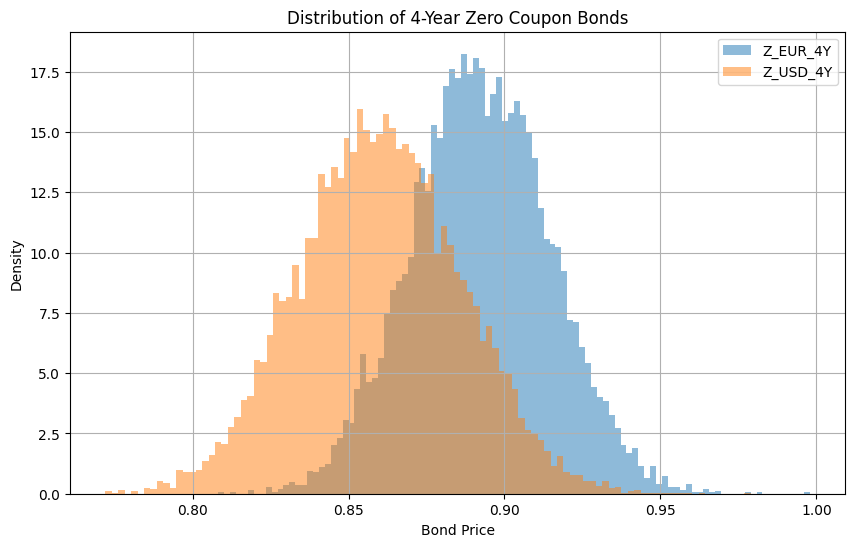

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(55)  

V_US_local_0 = np.exp(init_values.loc['EQV US', 'initial values']) 
V_EUR_0 = np.exp(init_values.loc['EQV EUR', 'initial values']) 
n_simulations = 10000
n_steps = 52  

delta_X_1 = np.random.multivariate_normal(mean=mu, cov=sigma, size=(n_simulations, n_steps))

delta_log_V_US_local = delta_X_1[:, :, 1].sum(axis=1) 
delta_log_V_EUR = delta_X_1[:, :, 2].sum(axis=1)       

V_US_local_1 = V_US_local_0 * np.exp(delta_log_V_US_local)
V_EUR_1 = V_EUR_0 * np.exp(delta_log_V_EUR)

delta_log_FX = np.random.multivariate_normal(mean=mu, cov=sigma, size=(n_simulations, n_steps))[:, :, 0]

delta_log_FX_1 = delta_log_FX.sum(axis=1)

FX_0 = np.exp(init_values.loc['fx_spot', 'initial values']) 
FX_1 = FX_0 * np.exp(delta_log_FX_1)

delta_X_1 = np.random.multivariate_normal(mean=mu, cov=sigma, size=(n_simulations, n_steps))

y_3Y_USD_0 = init_values.loc['3Y USD', 'initial values']
y_5Y_USD_0 = init_values.loc['5Y USD', 'initial values']


delta_y_3Y_USD = delta_X_1[:, :, 11]  
delta_y_5Y_USD = delta_X_1[:, :, 12]  

y_3Y_USD_1 = y_3Y_USD_0 + delta_y_3Y_USD.sum(axis=1)
y_5Y_USD_1 = y_5Y_USD_0 + delta_y_5Y_USD.sum(axis=1)

# Interpolation for 4 Year Yield USD
y_4Y_USD_1 = y_3Y_USD_1 + 0.5 * (y_5Y_USD_1 - y_3Y_USD_1)

Z_USD_4Y_1_local = np.exp(-y_4Y_USD_1 * 4) 


y_3Y_EUR_0 = init_values.loc['3Y EUR', 'initial values']
y_5Y_EUR_0 = init_values.loc['5Y EUR', 'initial values']

delta_y_3Y_EUR = delta_X_1[:, :, 5]  
delta_y_5Y_EUR = delta_X_1[:, :, 6]  

y_3Y_EUR_1 = y_3Y_EUR_0 + delta_y_3Y_EUR.sum(axis=1)
y_5Y_EUR_1 = y_5Y_EUR_0 + delta_y_5Y_EUR.sum(axis=1)

# Interpolation for 4 Year Yield EUR
y_4Y_EUR_1 = y_3Y_EUR_1 + 0.5 * (y_5Y_USD_1 - y_3Y_EUR_1)

Z_EUR_4Y_1 = np.exp(-y_4Y_EUR_1 * 4)  # 4-årig USD bond

P1 = np.c_[FX_1, V_US_local_1, V_EUR_1, Z_USD_4Y_1_local, Z_EUR_4Y_1]

P1_mean = P1.mean(axis=0)
P1_cov = np.cov(P1, rowvar=False)

print("Mean of P1:\n", P1_mean)
print("\nCovariance matrix of P1:\n", P1_cov)

plt.figure(figsize=(10, 6))
plt.hist(Z_EUR_4Y_1, bins=100, density=True, alpha=0.5, label='Z_EUR_4Y')
plt.hist(Z_USD_4Y_1_local, bins=100, density=True, alpha=0.5, label='Z_USD_4Y')
plt.title("Distribution of 4-Year Zero Coupon Bonds")
plt.xlabel("Bond Price")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


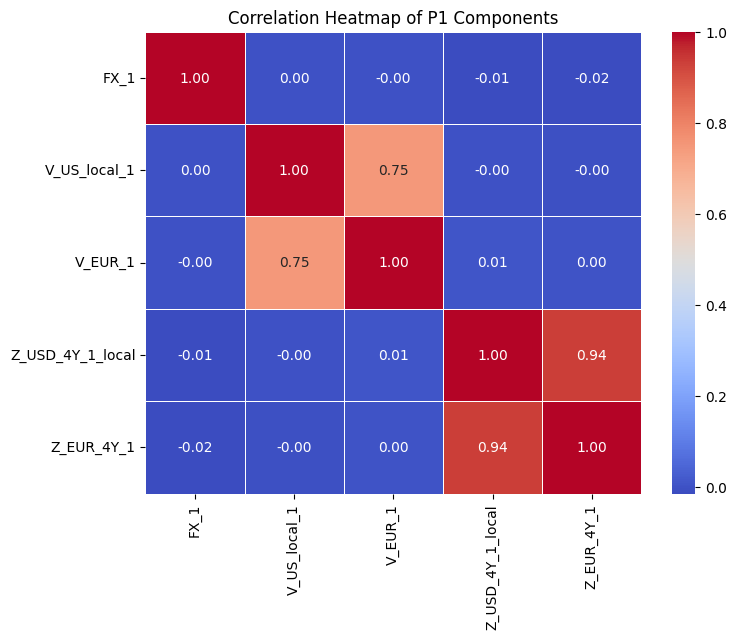

In [9]:
# Convert P1 to DataFrame for easier manipulation
P1_df = pd.DataFrame(P1, columns=["FX_1", "V_US_local_1", "V_EUR_1", "Z_USD_4Y_1_local", "Z_EUR_4Y_1"])

correlation_matrix = P1_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of P1 Components")
plt.show()

# Question 5: Distribution of Portfolio Assets in EUR 

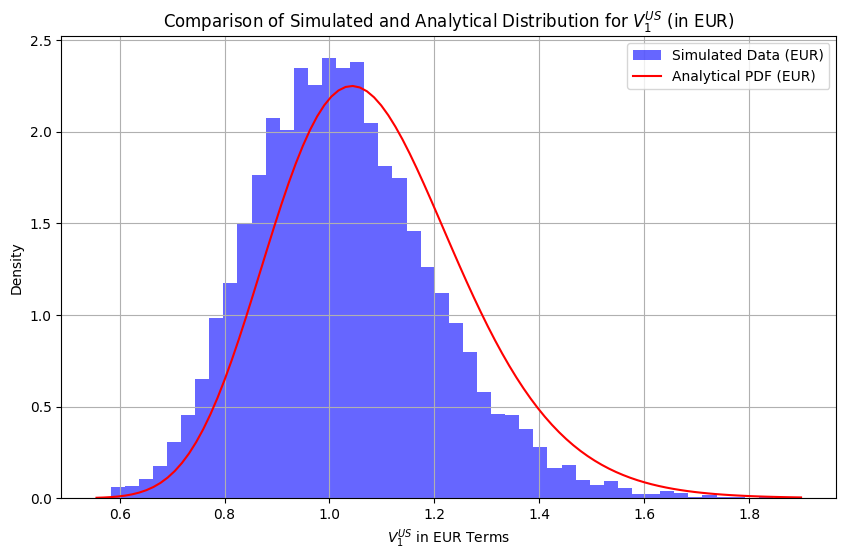

In [10]:
# Convert all components to EUR
FX_1_inv = 1 / FX_1  # Inverse of FX rate for conversion
V_US_1_EUR = V_US_local_1 * FX_1_inv  # US equity in EUR
Z_USD_4Y_1_EUR = Z_USD_4Y_1_local * FX_1_inv  # USD bond price in EUR

P1_EUR = np.c_[FX_1_inv, V_US_1_EUR, V_EUR_1, Z_USD_4Y_1_EUR, Z_EUR_4Y_1]

mu_log_V_US = mu[1] * n_steps  
sigma_log_V_US = np.sqrt(sigma[1, 1] * n_steps)  
mu_log_FX_inv = -mu[0] * n_steps  
sigma_log_FX_inv = np.sqrt(sigma[0, 0] * n_steps)  

mu_EUR = mu_log_V_US + mu_log_FX_inv
sigma_EUR = np.sqrt(sigma_log_V_US**2 + sigma_log_FX_inv**2)

x_values = np.linspace(V_US_1_EUR.min(), V_US_1_EUR.max(), 100)
pdf_values = lognorm.pdf(x_values, s=sigma_EUR, scale=np.exp(mu_EUR))

plt.figure(figsize=(10, 6))
plt.hist(V_US_1_EUR, bins=50, density=True, alpha=0.6, color="blue", label="Simulated Data (EUR)")
plt.plot(x_values, pdf_values, color="red", label="Analytical PDF (EUR)")
plt.title("Comparison of Simulated and Analytical Distribution for $V_1^{US}$ (in EUR)")
plt.xlabel("$V_1^{US}$ in EUR Terms")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()



# Question 6: Portfolio PnL

In [11]:
FX_0 = np.exp(init_values.loc['fx_spot', 'initial values'])  # Spot FX rate (EUR/USD)
y_USD_1Y_0 = init_values.loc['1Y USD', 'initial values']  
y_EUR_1Y_0 = init_values.loc['1Y EUR', 'initial values']  

# Forward price F_0^1
F01 = FX_0 * np.exp((y_USD_1Y_0 - y_EUR_1Y_0)*1)  
print(f"One-year forward price (F_0^1): {F01}")

One-year forward price (F_0^1): 1.0773447966979737


In [12]:
FX_1 = FX_0 * np.exp(delta_log_FX_1)
V_US_0_EUR = V_US_local_0/FX_0
V_US_1_EUR = V_US_local_1*FX_1_inv

y_USD_5Y_0 = init_values.loc['5Y USD', 'initial values']   
y_EUR_5Y_0 = init_values.loc['5Y EUR', 'initial values']   

Z_USD_5Y_local = np.exp(-y_USD_5Y_0 * 5)  
Z_EUR_5Y = np.exp(-y_EUR_5Y_0 * 5)  
Z_USD_5Y_0_EUR = Z_USD_5Y_local/FX_0


# PnL_1 calculation in EUR
PnL1_FX = (1 / F01) - (1 / FX_1)  
PnL1_US = (V_US_1_EUR - V_US_0_EUR)  # US Equities in EUR
PnL1_EUR = V_EUR_1 - V_EUR_0  
PnL1_USD_Bond = (Z_USD_4Y_1_EUR - Z_USD_5Y_0_EUR)  # USD Bonds in EUR
PnL1_EUR_Bond = Z_EUR_4Y_1 - Z_EUR_5Y  


PnL_1_EUR = np.c_[PnL1_FX, PnL1_US, PnL1_EUR, PnL1_USD_Bond, PnL1_EUR_Bond]

E_PnL = np.mean(PnL_1_EUR, axis=0)
Sigma_PnL = np.cov(PnL_1_EUR, rowvar=False)

print(E_PnL)
print(Sigma_PnL)


print(np.mean(E_PnL))
print(np.mean(Sigma_PnL))


[-0.01966895  0.08259375  0.07518827  0.03050913 -0.01218246]
[[ 5.39439044e-03 -5.85833815e-03 -3.98742402e-05 -4.66426299e-03
  -2.56739737e-05]
 [-5.85833815e-03  3.00955753e-02  1.94014958e-02  5.06378057e-03
   1.17197641e-05]
 [-3.98742402e-05  1.94014958e-02  2.83581683e-02  6.95623984e-05
   4.55880630e-06]
 [-4.66426299e-03  5.06378057e-03  6.95623984e-05  4.64059597e-03
   5.31851193e-04]
 [-2.56739737e-05  1.17197641e-05  4.55880630e-06  5.31851193e-04
   4.91389481e-04]]
0.03128794883606224
0.003918790312741874



PnL_matrix shape: (10000, 5)
PnL_matrix (first 5 rows):
 [[-0.00106123  0.18335208  0.00454271  0.03550759  0.02267298]
 [ 0.17311168 -0.28683204 -0.29603122 -0.12831132 -0.01122529]
 [-0.04367     0.04369236  0.02932639  0.08061766  0.00046972]
 [ 0.01719538  0.12358822  0.16356781  0.02249263  0.01225747]
 [-0.06044005  0.16350908  0.04696144  0.07265952 -0.00788585]]
Korrelation Matrix:
[[ 1.         -0.45978196 -0.0032239  -0.93223405 -0.01576918]
 [-0.45978196  1.          0.66411731  0.42848604  0.00304758]
 [-0.0032239   0.66411731  1.          0.00606385  0.00122123]
 [-0.93223405  0.42848604  0.00606385  1.          0.35220079]
 [-0.01576918  0.00304758  0.00122123  0.35220079  1.        ]]


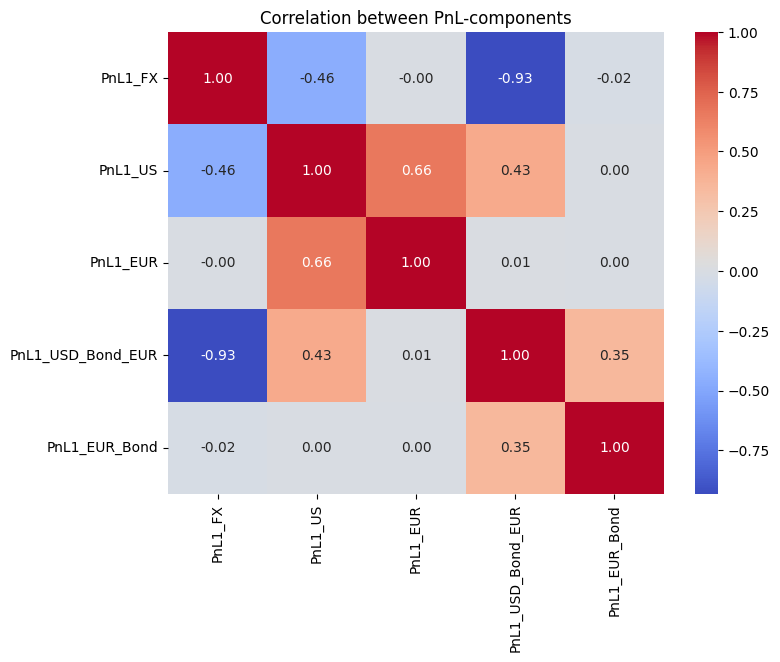

In [13]:
print("\nPnL_matrix shape:", PnL_1_EUR.shape)
print("PnL_matrix (first 5 rows):\n", PnL_1_EUR[:5])

correlation_matrix = np.corrcoef(PnL_1_EUR, rowvar=False)
print("Korrelation Matrix:")
print(correlation_matrix)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=['PnL1_FX', 'PnL1_US', 'PnL1_EUR', 'PnL1_USD_Bond_EUR', 'PnL1_EUR_Bond'],
            yticklabels=['PnL1_FX', 'PnL1_US', 'PnL1_EUR', 'PnL1_USD_Bond_EUR', 'PnL1_EUR_Bond'])
plt.title('Correlation between PnL-components')
plt.show()

In [14]:
PnL_FX = PnL_1_EUR[:, 0]  

mu_FX = E_PnL[0]  
sigma_FX = np.sqrt(Sigma_PnL[0, 0])  

x_values = np.linspace(PnL_FX.min(), PnL_FX.max(), 100)
pdf_values = norm.pdf(x_values, loc=mu_FX, scale=sigma_FX)

print("Expected PnL (E[PnL]):", E_PnL)
print("Covariance Matrix (Sigma_PnL):\n", Sigma_PnL)

h = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  
PnL_portfolio = PnL_1_EUR @ h  # Linear combination

mu_portfolio = np.mean(PnL_portfolio)
sigma_portfolio = np.std(PnL_portfolio)

x_portfolio = np.linspace(PnL_portfolio.min(), PnL_portfolio.max(), 100)
pdf_portfolio = norm.pdf(x_portfolio, loc=mu_portfolio, scale=sigma_portfolio)

print(f"Portfolio PnL - Expected Value: {mu_portfolio:.4f}, Standard Deviation: {sigma_portfolio:.4f}")


Expected PnL (E[PnL]): [-0.01966895  0.08259375  0.07518827  0.03050913 -0.01218246]
Covariance Matrix (Sigma_PnL):
 [[ 5.39439044e-03 -5.85833815e-03 -3.98742402e-05 -4.66426299e-03
  -2.56739737e-05]
 [-5.85833815e-03  3.00955753e-02  1.94014958e-02  5.06378057e-03
   1.17197641e-05]
 [-3.98742402e-05  1.94014958e-02  2.83581683e-02  6.95623984e-05
   4.55880630e-06]
 [-4.66426299e-03  5.06378057e-03  6.95623984e-05  4.64059597e-03
   5.31851193e-04]
 [-2.56739737e-05  1.17197641e-05  4.55880630e-06  5.31851193e-04
   4.91389481e-04]]
Portfolio PnL - Expected Value: 0.0313, Standard Deviation: 0.0626


Kolmogorov-Smirnov Test for Normality:
KS Statistic: 0.0193, P-Value: 0.0012
The test rejects the hypothesis of normality (p < 0.05).


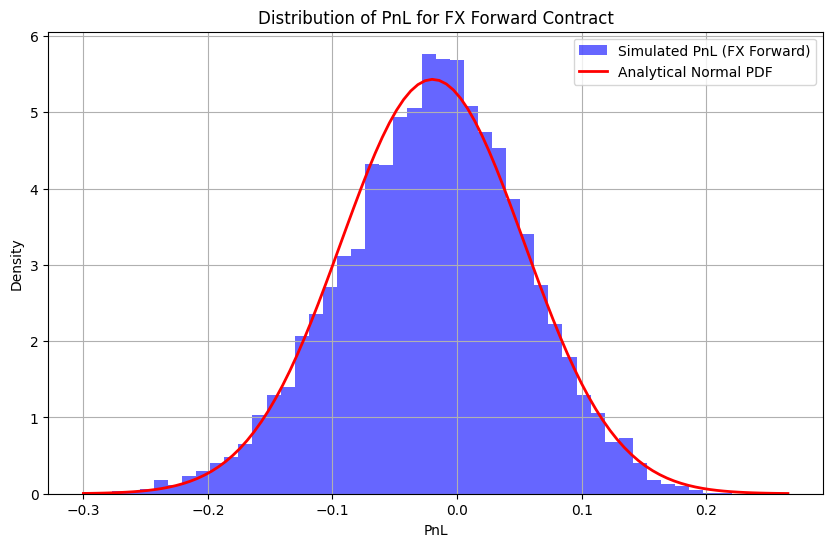

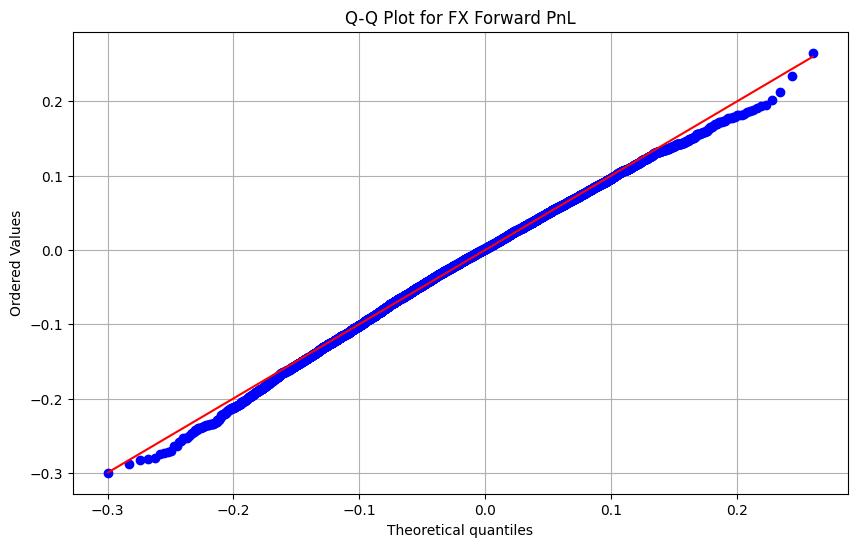

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, probplot

PnL_FX = PnL_1_EUR[:, 0]  

mu_FX = E_PnL[0]  
sigma_FX = np.sqrt(Sigma_PnL[0, 0])  

ks_stat, ks_p_value = kstest(PnL_FX, 'norm', args=(mu_FX, sigma_FX))

print(f"Kolmogorov-Smirnov Test for Normality:")
print(f"KS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")
if ks_p_value > 0.05:
    print("The test fails to reject that the portfolio PnL follows a normal distribution (p > 0.05).")
else:
    print("The test rejects the hypothesis of normality (p < 0.05).")

x_values = np.linspace(PnL_FX.min(), PnL_FX.max(), 100)
pdf_values = norm.pdf(x_values, loc=mu_FX, scale=sigma_FX)

plt.figure(figsize=(10, 6))
plt.hist(PnL_FX, bins=50, density=True, alpha=0.6, color="blue", label="Simulated PnL (FX Forward)")
plt.plot(x_values, pdf_values, color="red", linewidth=2, label="Analytical Normal PDF")
plt.title("Distribution of PnL for FX Forward Contract")
plt.xlabel("PnL")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# Q-Q plot for at vurdere normalitet
plt.figure(figsize=(10, 6))
probplot(PnL_FX, dist="norm", sparams=(mu_FX, sigma_FX), plot=plt)
plt.title("Q-Q Plot for FX Forward PnL")
plt.grid()
plt.show()


Kolmogorov-Smirnov Test for Normality (Portfolio PnL):
KS Statistic: 0.0235, P-Value: 0.0000
The test rejects the hypothesis of normality (p < 0.05).


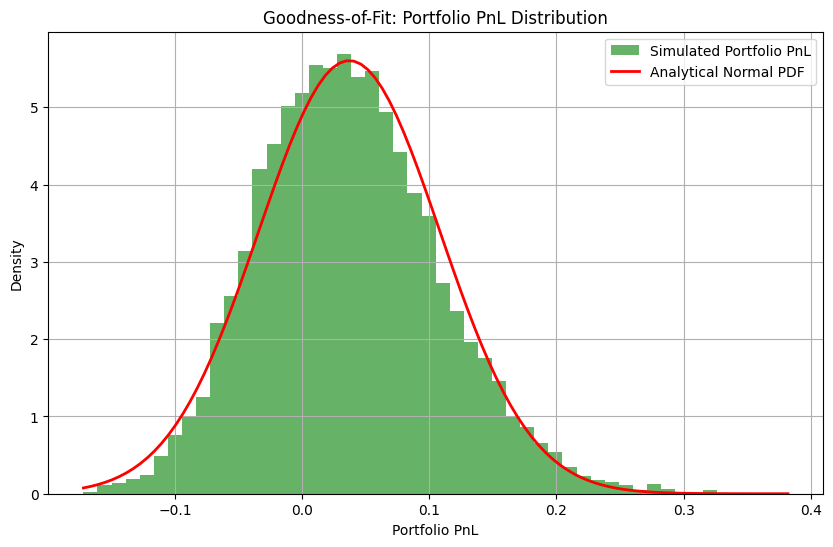

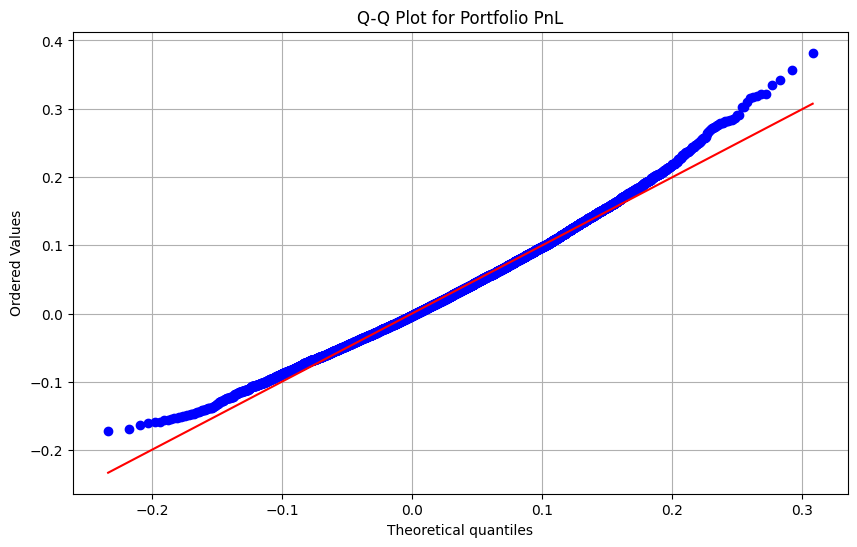

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest, probplot

h = np.array([0.2, 0.2, 0.3, 0.3])  

PnL_portfolio = PnL_1_EUR[:, 1:] @ h  # Without FX forward

mu_portfolio = np.mean(PnL_portfolio)  
sigma_portfolio = np.std(PnL_portfolio) 

ks_stat, ks_p_value = kstest(PnL_portfolio, 'norm', args=(mu_portfolio, sigma_portfolio))

print("Kolmogorov-Smirnov Test for Normality (Portfolio PnL):")
print(f"KS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")
if ks_p_value > 0.05:
    print("The test fails to reject that the portfolio PnL follows a normal distribution (p > 0.05).")
else:
    print("The test rejects the hypothesis of normality (p < 0.05).")

x_values = np.linspace(PnL_portfolio.min(), PnL_portfolio.max(), 100)
pdf_values = norm.pdf(x_values, loc=mu_portfolio, scale=sigma_portfolio)

plt.figure(figsize=(10, 6))
plt.hist(PnL_portfolio, bins=50, density=True, alpha=0.6, color="green", label="Simulated Portfolio PnL")
plt.plot(x_values, pdf_values, color="red", linewidth=2, label="Analytical Normal PDF")
plt.title("Goodness-of-Fit: Portfolio PnL Distribution")
plt.xlabel("Portfolio PnL")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
probplot(PnL_portfolio, dist="norm", sparams=(mu_portfolio, sigma_portfolio), plot=plt)
plt.title("Q-Q Plot for Portfolio PnL")
plt.grid()
plt.show()


In [17]:
# Forward-price F_0^1 (ifølge standardteori: F_0^1 = FX_0 * exp((y_USD_1 - y_EUR_1)*1))
F01 = FX_0 * np.exp((y_USD_1Y_0 - y_EUR_1Y_0)*1)
print(f"One-year forward price (F_0^1): {F01}")

# emp = empirical
mu_portfolio_emp = np.mean(PnL_portfolio)
sigma_portfolio_emp = np.std(PnL_portfolio)

h_analytical = np.array([0, 0.2, 0.2, 0.3, 0.3]) 

# Analytical
mu_portfolio = np.dot(h_analytical, E_PnL)
sigma_portfolio = np.sqrt(h_analytical.T @ Sigma_PnL @ h_analytical)


print(mu_portfolio)
print(sigma_portfolio)

One-year forward price (F_0^1): 1.0773447966979737
0.037054404832415254
0.07117468578690239


# Question 7: Optimal Hedge Ratio

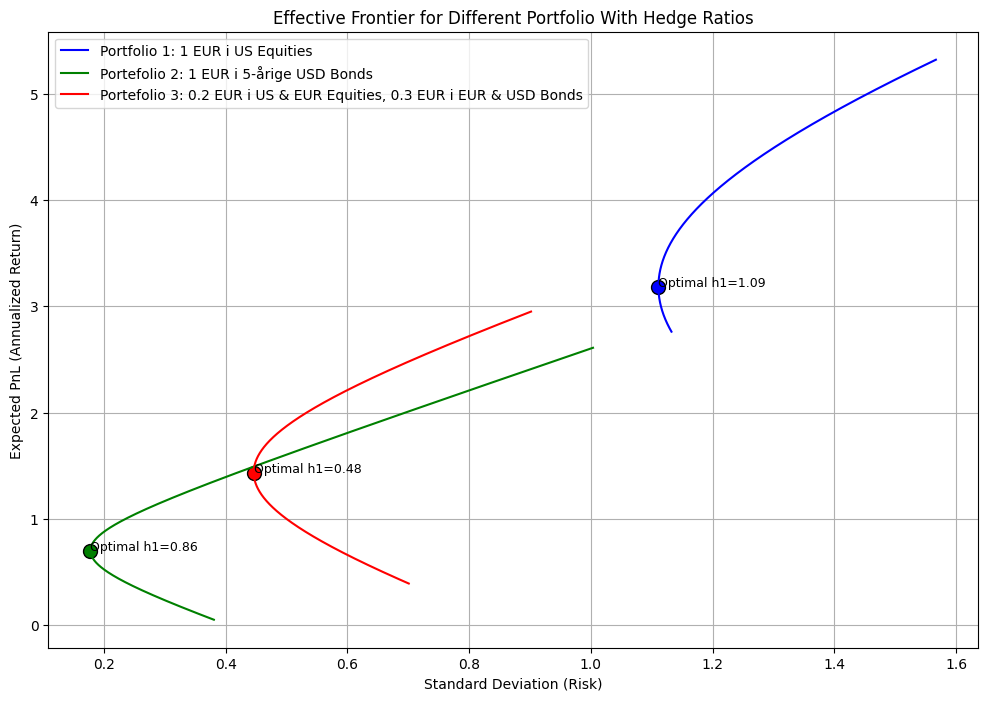

Portfolio 1: 1 EUR i US Equities:
Optimal Hedge Ratio (h1): 1.0860
Optimal Standard Deviation: 1.1109
Optimal Expected PnL: 3.1841

Portefolio 2: 1 EUR i 5-årige USD Bonds:
Optimal Hedge Ratio (h1): 0.8647
Optimal Standard Deviation: 0.1778
Optimal Expected PnL: 0.7021

Portefolio 3: 0.2 EUR i US & EUR Equities, 0.3 EUR i EUR & USD Bonds:
Optimal Hedge Ratio (h1): 0.4795
Optimal Standard Deviation: 0.4460
Optimal Expected PnL: 1.4364



In [18]:
import numpy as np
import matplotlib.pyplot as plt

Sigma_PnL_annual = Sigma_PnL * 52  
E_PnL_annual = E_PnL * 52 

portfolios = [
    {'name': 'Portfolio 1: 1 EUR i US Equities', 'allocation': np.array([1, 0, 0, 0])},
    {'name': 'Portefolio 2: 1 EUR i 5-årige USD Bonds', 'allocation': np.array([0, 0, 1, 0])},
    {'name': 'Portefolio 3: 0.2 EUR i US & EUR Equities, 0.3 EUR i EUR & USD Bonds', 
     'allocation': np.array([0.2, 0.2, 0.3, 0.3])}
]

hedge_ratios = np.linspace(-1, 1.5, 1000)  

# --- Results ---
results = []

for portfolio in portfolios:
    h2 = portfolio['allocation']  
    Sigma_PnL_12 = Sigma_PnL_annual[0, 1:]  
    Sigma_PnL_11 = Sigma_PnL_annual[0, 0]   

    std_list = []
    pnl_list = []
    Sigma_PnL_new = []
    E_PnL_new = []

    # Loop over hedge ratios
    for h1 in hedge_ratios:
        weights = np.concatenate(([h1], h2))

        E_PnL_updated = np.dot(weights, E_PnL_annual)
        E_PnL_new.append(E_PnL_updated)

        Sigma_PnL_updated = weights.T @ Sigma_PnL_annual @ weights
        Sigma_PnL_new.append(Sigma_PnL_updated)

        std_dev = np.sqrt(Sigma_PnL_updated)
        pnl_list.append(E_PnL_updated)
        std_list.append(std_dev)

    
    optimal_h1 = -np.dot(Sigma_PnL_12, h2) / Sigma_PnL_11
    weights_optimal = np.concatenate(([optimal_h1], h2))

    
    cov_opt = weights_optimal.T @ Sigma_PnL_annual @ weights_optimal
    e_pnl_opt = np.dot(weights_optimal, E_PnL_annual)

    
    results.append({
        'name': portfolio['name'],
        'std_dev': std_list,
        'pnl': pnl_list,
        'Sigma_PnL_new': Sigma_PnL_new,  
        'E_PnL_new': E_PnL_new,         
        'optimal_h1': optimal_h1,
        'optimal_std': np.sqrt(cov_opt),
        'optimal_pnl': e_pnl_opt
    })


plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red']

for idx, portfolio in enumerate(results):
    plt.plot(portfolio['std_dev'], portfolio['pnl'], label=portfolio['name'], color=colors[idx])
    plt.scatter(portfolio['optimal_std'], portfolio['optimal_pnl'], color=colors[idx], s=100, edgecolors='k')
    plt.text(portfolio['optimal_std'], portfolio['optimal_pnl'], 
             f"Optimal h1={portfolio['optimal_h1']:.2f}", fontsize=9)

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected PnL (Annualized Return)')
plt.title('Effective Frontier for Different Portfolio With Hedge Ratios')
plt.legend()
plt.grid(True)
plt.show()


for portfolio in results:
    print(f"{portfolio['name']}:")
    print(f"Optimal Hedge Ratio (h1): {portfolio['optimal_h1']:.4f}")
    print(f"Optimal Standard Deviation: {portfolio['optimal_std']:.4f}")
    print(f"Optimal Expected PnL: {portfolio['optimal_pnl']:.4f}\n")



# Question 8: 5% CVaR Hedge Ratio and Portfolio Analysis

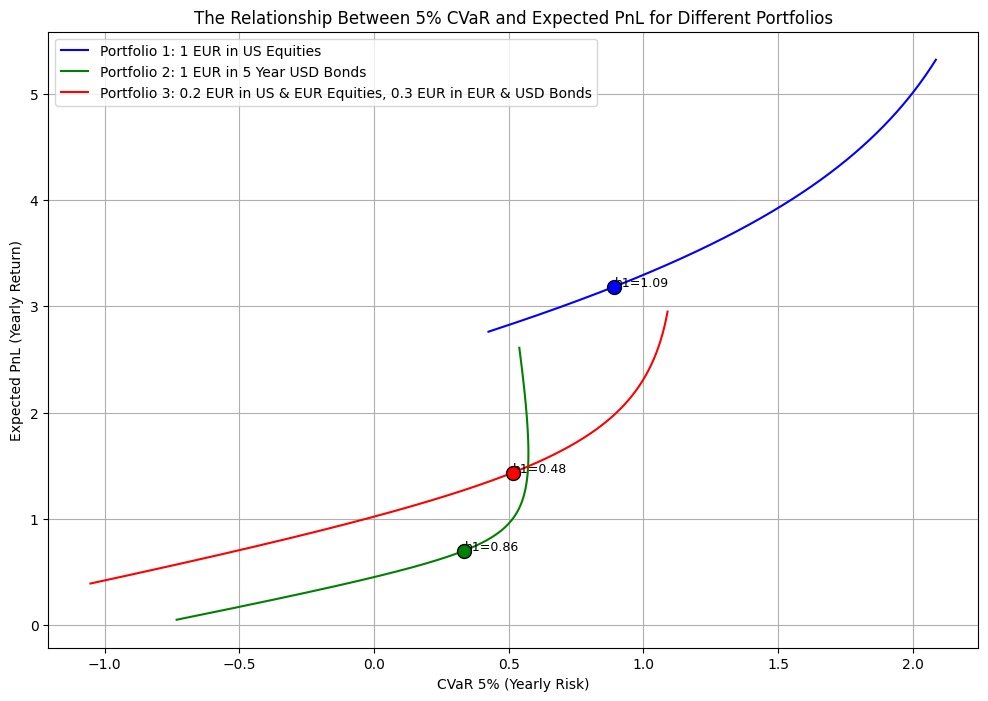

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

alpha = 0.05  # 5% CVaR
phi_z = norm.pdf(norm.ppf(alpha))  
num_simulations = 10000  
h1_values = np.linspace(-1, 1.5, num_simulations)  

Sigma_PnL_annual = Sigma_PnL*52   
E_PnL_annual = E_PnL *52 

portfolios = [
    {'name': 'Portfolio 1: 1 EUR in US Equities', 'allocation': np.array([1, 0, 0, 0])},
    {'name': 'Portfolio 2: 1 EUR in 5 Year USD Bonds', 'allocation': np.array([0, 0, 1, 0])},
    {'name': 'Portfolio 3: 0.2 EUR in US & EUR Equities, 0.3 EUR in EUR & USD Bonds', 
     'allocation': np.array([0.2, 0.2, 0.3, 0.3])}
]


plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'red']

for idx, portfolio in enumerate(portfolios):
    h2 = portfolio['allocation']
    Sigma_12 = Sigma_PnL_annual[0, 1:]  
    Sigma_11 = Sigma_PnL_annual[0, 0]   

    h1_opt = -np.dot(Sigma_12, h2) / Sigma_11

    weights_opt = np.concatenate(([h1_opt], h2))
    E_PnL_opt = np.dot(weights_opt, E_PnL_annual)
    std_PnL_opt = np.sqrt(np.dot(weights_opt, np.dot(Sigma_PnL_annual, weights_opt)))
    CVaR_opt = E_PnL_opt - std_PnL_opt * (phi_z / alpha)

    CVaR_5_values = []
    E_PnL_values = []

    for h1 in h1_values:
        weights = np.concatenate(([h1], h2))
        mu = np.dot(weights, E_PnL_annual)
        sigma = np.sqrt(np.dot(weights, np.dot(Sigma_PnL_annual, weights)))
        CVaR_5 = mu - sigma * (phi_z / alpha)

        CVaR_5_values.append(CVaR_5)
        E_PnL_values.append(mu)

    
    plt.plot(CVaR_5_values, E_PnL_values, label=portfolio['name'], color=colors[idx])

    
    plt.scatter(CVaR_opt, E_PnL_opt, color=colors[idx], edgecolors='k', s=100, zorder=5)
    plt.text(CVaR_opt, E_PnL_opt, f"h1={h1_opt:.2f}", fontsize=9)


plt.xlabel('CVaR 5% (Yearly Risk)')
plt.ylabel('Expected PnL (Yearly Return)')
plt.title('The Relationship Between 5% CVaR and Expected PnL for Different Portfolios')
plt.legend()
plt.grid(True)
plt.show()



# Question 9: Simulation Study on Estimation Uncertainty in Covariance Matrix Σ 

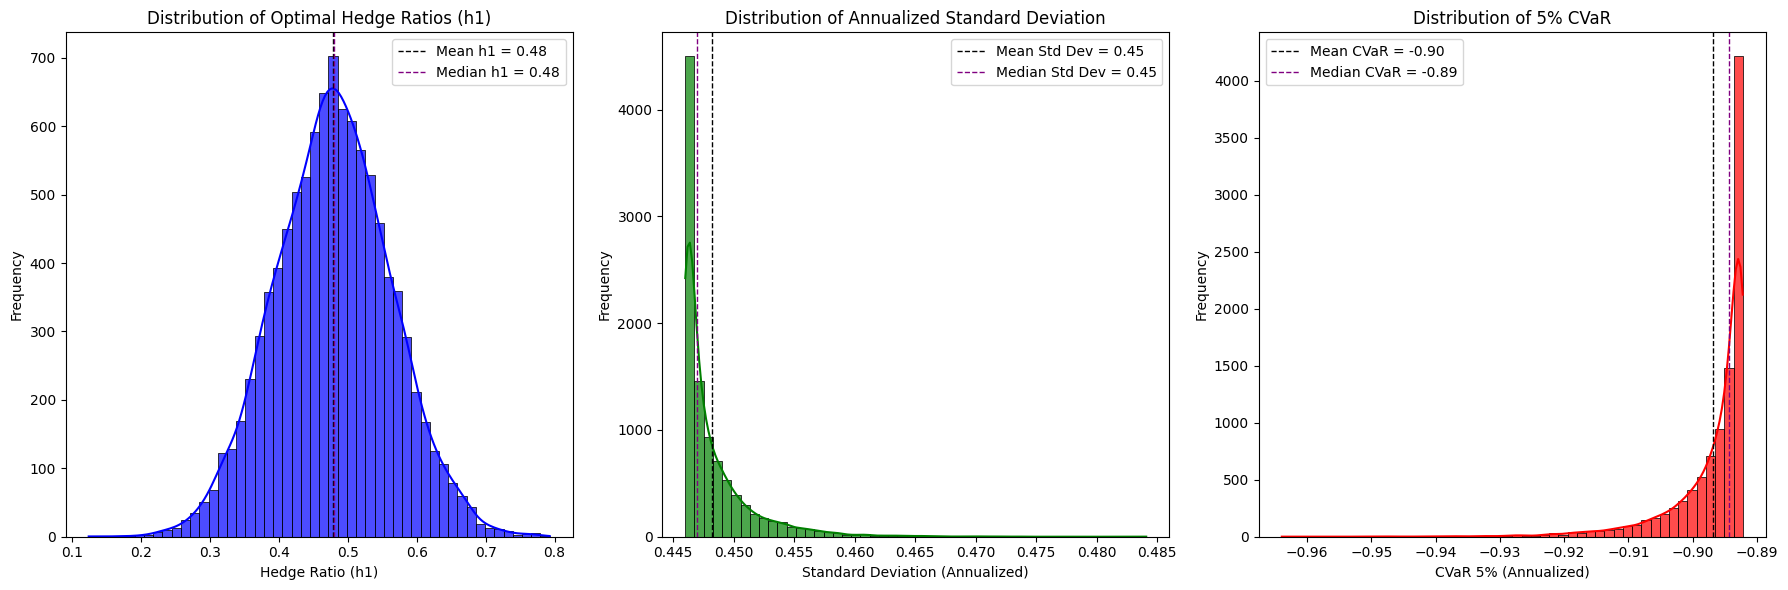

Summary Statistics:
-------------------
Number of Simulations: 10000

Optimal Hedge Ratios (h1):
  Mean: 0.4790
  Median: 0.4794

Annualized Standard Deviation:
  Mean: 0.4482
  Median: 0.4470

5% CVaR (Annualized):
  Mean: -0.8969
  Median: -0.8944


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns  

# --- Parameters ---
num_obs = 104  
num_sim = 10000  
num_assets = 5  
alpha = 0.05  
z = norm.ppf(alpha)  
phi_z = norm.pdf(z)  

# --- Portfolio allocation ---
h2_fixed = np.array([0.2, 0.2, 0.3, 0.3])  

Sigma_PnL_weekly = Sigma_PnL  
Sigma_PnL_annual = Sigma_PnL_weekly * 52  #
E_PnL_weekly = E_PnL / 52  
E_PnL_annual = E_PnL_weekly * 52  

def compute_optimal_h1(Sigma, h2):
    Sigma_12 = Sigma[0, 1:]  
    Sigma_11 = Sigma[0, 0]  
    h1 = -np.dot(Sigma_12, h2) / Sigma_11  
    return h1

# --- Simulation of Covariance Estimation Uncertainty ---
h1_simulated = []
for sim in range(num_sim):
    
    simulated_data = np.random.multivariate_normal(E_PnL_weekly, Sigma_PnL_weekly, size=num_obs)
    
    Sigma_sample = np.cov(simulated_data, rowvar=False, bias=False)
    
    eigenvalues = np.linalg.eigvals(Sigma_sample)
    if np.all(eigenvalues > 0):
        h1_opt = compute_optimal_h1(Sigma_sample, h2_fixed)
        h1_simulated.append(h1_opt)


PnL_values = []
std_values = []
CVaR_5_values = []

for h1 in h1_simulated:
    weights = np.concatenate(([h1], h2_fixed))  
    
    mu_pnl = np.dot(weights, E_PnL_annual)
    var_pnl = np.dot(weights, np.dot(Sigma_PnL_annual, weights))
    sigma_pnl = np.sqrt(var_pnl)
    
    cvar_5 = mu_pnl - sigma_pnl * (phi_z / alpha)
    
    PnL_values.append(mu_pnl)
    std_values.append(sigma_pnl)
    CVaR_5_values.append(cvar_5)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(h1_simulated, bins=50, color='blue', alpha=0.7, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Optimal Hedge Ratios (h1)')
axs[0].set_xlabel('Hedge Ratio (h1)')
axs[0].set_ylabel('Frequency')

mean_h1 = np.mean(h1_simulated)
median_h1 = np.median(h1_simulated)
axs[0].axvline(mean_h1, color='k', linestyle='dashed', linewidth=1, label=f'Mean h1 = {mean_h1:.2f}')
axs[0].axvline(median_h1, color='purple', linestyle='dashed', linewidth=1, label=f'Median h1 = {median_h1:.2f}')
axs[0].legend()

sns.histplot(std_values, bins=50, color='green', alpha=0.7, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Annualized Standard Deviation')
axs[1].set_xlabel('Standard Deviation (Annualized)')
axs[1].set_ylabel('Frequency')

mean_std = np.mean(std_values)
median_std = np.median(std_values)
axs[1].axvline(mean_std, color='k', linestyle='dashed', linewidth=1, label=f'Mean Std Dev = {mean_std:.2f}')
axs[1].axvline(median_std, color='purple', linestyle='dashed', linewidth=1, label=f'Median Std Dev = {median_std:.2f}')
axs[1].legend()

sns.histplot(CVaR_5_values, bins=50, color='red', alpha=0.7, kde=True, ax=axs[2])
axs[2].set_title('Distribution of 5% CVaR')
axs[2].set_xlabel('CVaR 5% (Annualized)')
axs[2].set_ylabel('Frequency')

mean_cvar = np.mean(CVaR_5_values)
median_cvar = np.median(CVaR_5_values)
axs[2].axvline(mean_cvar, color='k', linestyle='dashed', linewidth=1, label=f'Mean CVaR = {mean_cvar:.2f}')
axs[2].axvline(median_cvar, color='purple', linestyle='dashed', linewidth=1, label=f'Median CVaR = {median_cvar:.2f}')
axs[2].legend()

plt.tight_layout()
plt.show()

# --- Summary Statistics ---
print("Summary Statistics:")
print("-------------------")
print(f"Number of Simulations: {len(h1_simulated)}\n")

print("Optimal Hedge Ratios (h1):")
print(f"  Mean: {mean_h1:.4f}")
print(f"  Median: {median_h1:.4f}\n")

print("Annualized Standard Deviation:")
print(f"  Mean: {mean_std:.4f}")
print(f"  Median: {median_std:.4f}\n")

print("5% CVaR (Annualized):")
print(f"  Mean: {mean_cvar:.4f}")
print(f"  Median: {median_cvar:.4f}")

# Question 10: Portfolio Optimization Strategy


Optimal hedge ratio for US equities: 1.0860055858157585
Optimal hedge ratio for US bonds: 0.8646506101131222


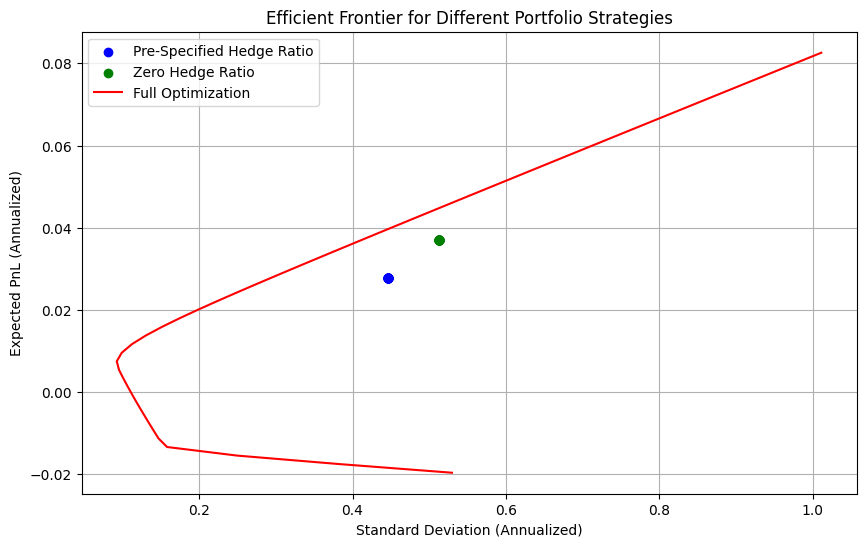

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Parametre
num_assets = 4  
alpha = 0.05
num_targets = 50  


h2_fixed = np.array([0.2, 0.2, 0.3, 0.3])


Sigma_US_equities = Sigma_PnL_annual[0, 0]  
Cov_US_equities = Sigma_PnL_annual[0, 1]   
h1_US_equities = - Cov_US_equities / Sigma_US_equities

Cov_US_bonds = Sigma_PnL_annual[0, 3]       
h1_US_bonds = - Cov_US_bonds / Sigma_US_equities

print("Optimal hedge ratio for US equities:", h1_US_equities)
print("Optimal hedge ratio for US bonds:", h1_US_bonds)

def compute_h1_pre_specified(h2):
    hedge_ratios = np.array([h1_US_equities, 0, h1_US_bonds, 0])
    h1 = np.dot(h2, hedge_ratios)
    return h1

def pre_specified_strategy(h2_allocation, Sigma, mu):
    h1 = compute_h1_pre_specified(h2_allocation)
    weights = np.concatenate(([h1], h2_allocation))
    pnl = np.dot(weights, mu)
    std = np.sqrt(np.dot(weights, np.dot(Sigma, weights)))
    return pnl, std

def zero_hedge_strategy(h2_allocation, Sigma, mu):
    h1 = 0
    weights = np.concatenate(([h1], h2_allocation))
    pnl = np.dot(weights, mu)
    std = np.sqrt(np.dot(weights, np.dot(Sigma, weights)))
    return pnl, std

def full_optimization(Sigma, mu, target_pnl):
    def objective(w):
        return np.sqrt(w.T @ Sigma @ w)  # Minimer varians
    
    constraints = ({'type': 'eq', 'fun': lambda w: np.dot(w, mu) - target_pnl},  # PnL constraint
                   {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})  # Budget constraint
    
    bounds = [(None, None)] + [(0, None)] * (len(mu) - 1)  # Ikke-short constraint
    w0 = np.ones(len(mu)) / len(mu)
    
    result = minimize(objective, w0, constraints=constraints, bounds=bounds)
    return result.x

returns = np.linspace(min(E_PnL_annual), max(E_PnL_annual), num_targets)
strategies = {'Pre-Specified Hedge Ratio': [], 'Zero Hedge Ratio': [], 'Full Optimization': []}

for target in returns:
    # Pre-Specified Strategy
    pnl1, std1 = pre_specified_strategy(h2_fixed, Sigma_PnL_annual, E_PnL_annual)
    strategies['Pre-Specified Hedge Ratio'].append((std1, pnl1))
    
    # Zero Hedge Strategy
    pnl2, std2 = zero_hedge_strategy(h2_fixed, Sigma_PnL_annual, E_PnL_annual)
    strategies['Zero Hedge Ratio'].append((std2, pnl2))
    
    # Full Optimization
    w_opt = full_optimization(Sigma_PnL_annual, E_PnL_annual, target)
    pnl3 = np.dot(w_opt, E_PnL_annual)
    std3 = np.sqrt(np.dot(w_opt, np.dot(Sigma_PnL_annual, w_opt)))
    strategies['Full Optimization'].append((std3, pnl3))

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']

for i, (name, values) in enumerate(strategies.items()):
    if values:  
        risks, pnls = zip(*values)
        if name == "Pre-Specified Hedge Ratio" or name == "Zero Hedge Ratio":
            plt.scatter(risks, pnls, label=name, color=colors[i])
        else:
            plt.plot(risks, pnls, label=name, color=colors[i])

plt.xlabel('Standard Deviation (Annualized)')
plt.ylabel('Expected PnL (Annualized)')
plt.title('Efficient Frontier for Different Portfolio Strategies')
plt.legend()
plt.grid()
plt.show()


# Question 11:  Simulation Study for Three Strategy

Results From Simulated Strategies:

Strategy: Pre-Specified Hedge Ratio
  PnL: [0.02666124 0.02742683 0.02649281] ... (10000 total)
  Std: [0.44676513 0.44604506 0.44705098] ... (10000 total)
  CVaR: [-0.89488691 -0.89263602 -0.89564496] ... (10000 total)
  h1: [0.52840482 0.48948085 0.53696786] ... (10000 total)

Strategy: Full Optimization
  PnL: [ 2.21860958e-12 -2.96062110e-14 -3.49382839e-13] ... (10000 total)
  Std: [0.16341649 0.16563763 0.16339034] ... (10000 total)
  CVaR: [-0.33708129 -0.34166286 -0.33702734] ... (10000 total)
  h1: [0.37796451 0.27678464 0.31806669] ... (10000 total)


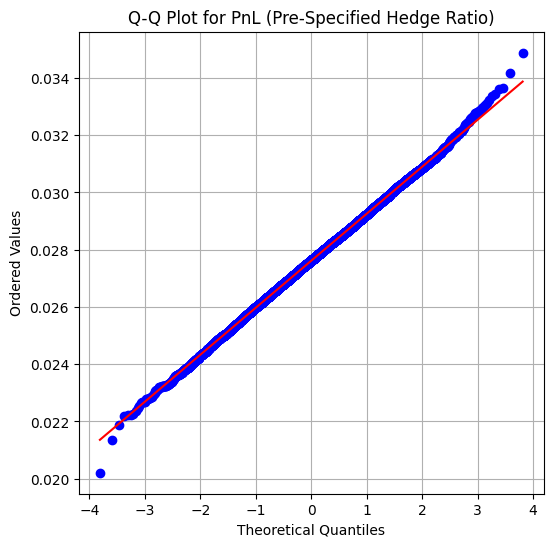

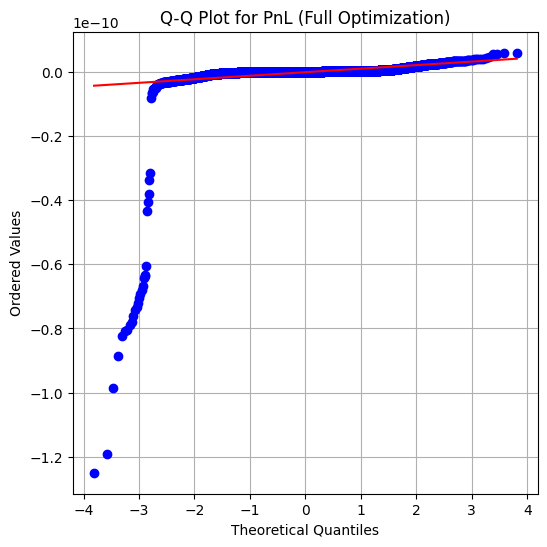

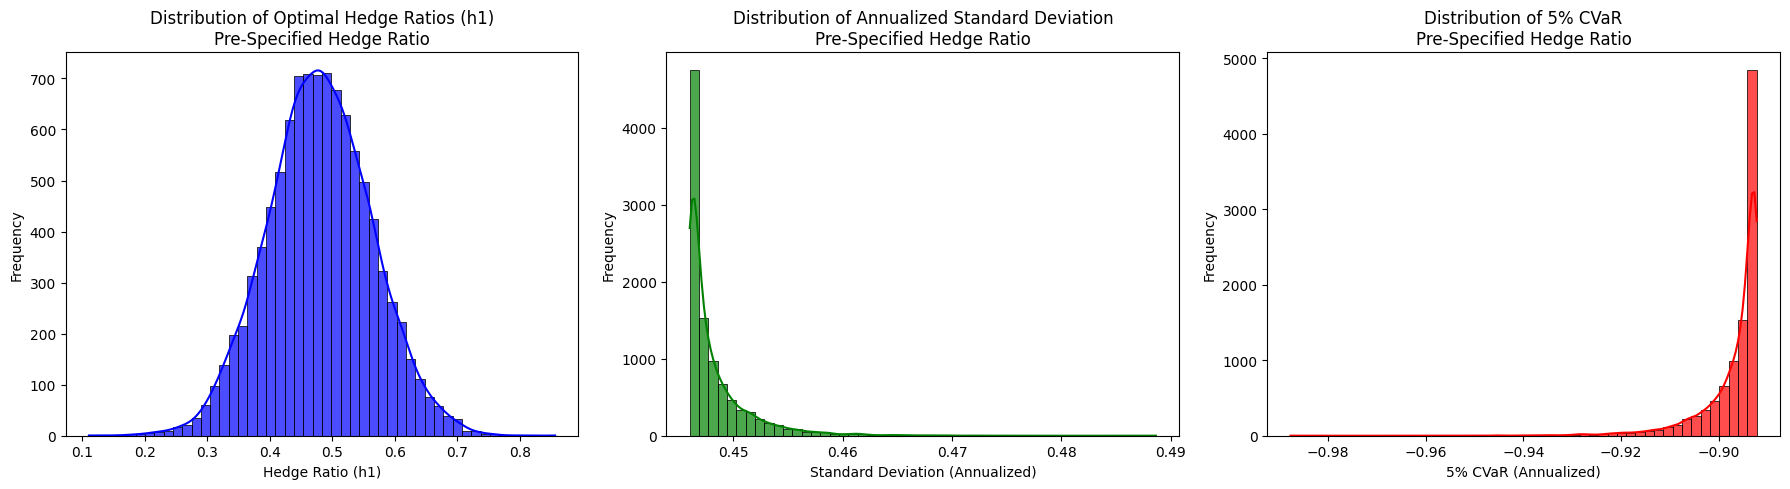

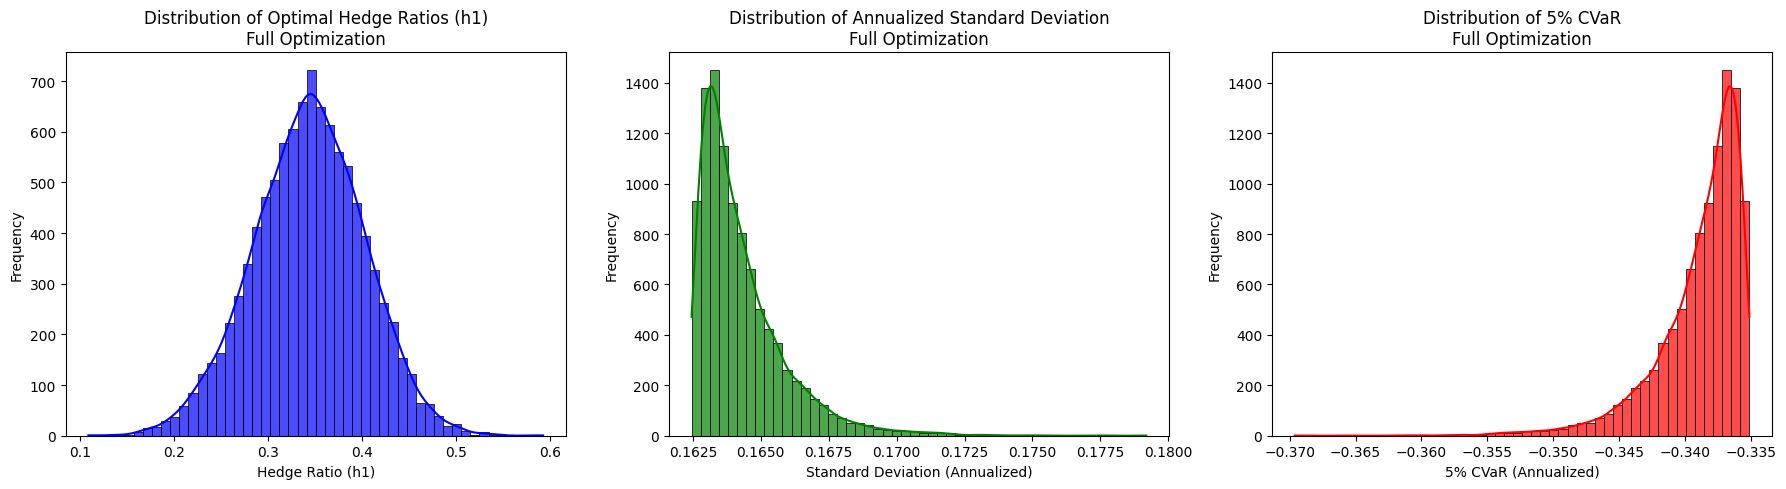

In [26]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy.optimize import minimize

num_obs = 104  # 
num_sim = 10000  
alpha = 0.05
z = norm.ppf(alpha)

h2_fixed = np.array([0.2, 0.2, 0.3, 0.3])

def calculate_pnl_risk(weights, E_PnL, Sigma_PnL):
    pnl = np.dot(weights, E_PnL)
    risk = np.sqrt(np.dot(weights, np.dot(Sigma_PnL, weights)))
    return pnl, risk

def compute_optimal_h1(Sigma_sample, h2_fixed):
    Sigma_PnL_12 = Sigma_sample[0, 1:]
    Sigma_PnL_11 = Sigma_sample[0, 0]
    h1_opt = -np.dot(Sigma_PnL_12, h2_fixed) / Sigma_PnL_11
    return h1_opt

def mean_variance_optimization(E_PnL, Sigma_PnL, target_pnl, initial_weights, bounds, constraints):
    def objective(weights):
        return np.sqrt(np.dot(weights, np.dot(Sigma_PnL, weights)))
    
    result = minimize(objective, initial_weights, constraints=constraints, bounds=bounds)
    return result.x if result.success else None

def print_sample_results(results_sim):
    print("Results From Simulated Strategies:")
    for strategy, metrics in results_sim.items():
        print(f"\nStrategy: {strategy}")
        for metric, values in metrics.items():
            print(f"  {metric}: {values[:3]} ... ({len(values)} total)")

results_sim = {
    'Pre-Specified Hedge Ratio': {'PnL': [], 'Std': [], 'CVaR': [], 'h1': []},
    'Full Optimization': {'PnL': [], 'Std': [], 'CVaR': [], 'h1': []}
}

for sim in range(num_sim):
    simulated_data = np.random.multivariate_normal(mean=E_PnL_annual / 52, cov=Sigma_PnL_annual / 52, size=num_obs)
    
    sample_Sigma_weekly = np.cov(simulated_data, rowvar=False, bias=False)
    sample_Sigma_annual = sample_Sigma_weekly * 52
    
    eigenvalues = np.linalg.eigvals(sample_Sigma_annual)
    if np.all(eigenvalues > 0):
        # --- Pre-Specified Hedge Ratio ---
        h1_pre = compute_optimal_h1(sample_Sigma_annual, h2_fixed)
        weights_pre = np.concatenate(([h1_pre], h2_fixed))
        pnl_pre, std_pre = calculate_pnl_risk(weights_pre, E_PnL_annual, Sigma_PnL_annual)
        cvar_pre = pnl_pre - std_pre * (norm.pdf(z) / alpha)
        
        results_sim['Pre-Specified Hedge Ratio']['PnL'].append(pnl_pre)
        results_sim['Pre-Specified Hedge Ratio']['Std'].append(std_pre)
        results_sim['Pre-Specified Hedge Ratio']['CVaR'].append(cvar_pre)
        results_sim['Pre-Specified Hedge Ratio']['h1'].append(h1_pre)
        
        
        target_pnl = 0  
        
        constraints = (
            {'type': 'eq', 'fun': lambda w: np.dot(w, E_PnL_annual) - target_pnl},  
            {'type': 'eq', 'fun': lambda w: np.sum(w[1:]) - 1}  
        )
        
        bounds = [(None, None)] + [(0, None)] * len(h2_fixed)  
        initial_weights = np.concatenate(([0], h2_fixed))
        
        optimized_weights = mean_variance_optimization(E_PnL_annual, sample_Sigma_annual, target_pnl, initial_weights, bounds, constraints)
        
        if optimized_weights is not None:
            pnl_full, std_full = calculate_pnl_risk(optimized_weights, E_PnL_annual, Sigma_PnL_annual)
            cvar_full = pnl_full - std_full * (norm.pdf(z) / alpha)
            h1_full = optimized_weights[0]
            
            results_sim['Full Optimization']['PnL'].append(pnl_full)
            results_sim['Full Optimization']['Std'].append(std_full)
            results_sim['Full Optimization']['CVaR'].append(cvar_full)
            results_sim['Full Optimization']['h1'].append(h1_full)
        else:
            failure_count += 1
            results_sim['Full Optimization']['PnL'].append(np.nan)
            results_sim['Full Optimization']['Std'].append(np.nan)
            results_sim['Full Optimization']['CVaR'].append(np.nan)
            results_sim['Full Optimization']['h1'].append(np.nan)

for strategy in results_sim:
    results_sim[strategy]['PnL'] = np.array(results_sim[strategy]['PnL'])
    results_sim[strategy]['Std'] = np.array(results_sim[strategy]['Std'])
    results_sim[strategy]['CVaR'] = np.array(results_sim[strategy]['CVaR'])
    results_sim[strategy]['h1'] = np.array(results_sim[strategy]['h1'])

print_sample_results(results_sim)

def plot_qq(metric_data, strategy_name, metric_name):
    plt.figure(figsize=(6, 6))
    probplot(metric_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {metric_name} ({strategy_name})')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show()

plot_qq(results_sim['Pre-Specified Hedge Ratio']['PnL'], 'Pre-Specified Hedge Ratio', 'PnL')
plot_qq(results_sim['Full Optimization']['PnL'], 'Full Optimization', 'PnL')


for strategy in results_sim:
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    sns.histplot(results_sim[strategy]['h1'], bins=50, color='blue', alpha=0.7, kde=True, ax=axs[0])
    axs[0].set_title(f'Distribution of Optimal Hedge Ratios (h1)\n{strategy}')
    axs[0].set_xlabel('Hedge Ratio (h1)')
    axs[0].set_ylabel('Frequency')
    
    sns.histplot(results_sim[strategy]['Std'], bins=50, color='green', alpha=0.7, kde=True, ax=axs[1])
    axs[1].set_title(f'Distribution of Annualized Standard Deviation\n{strategy}')
    axs[1].set_xlabel('Standard Deviation (Annualized)')
    axs[1].set_ylabel('Frequency')
    
    sns.histplot(results_sim[strategy]['CVaR'], bins=50, color='red', alpha=0.7, kde=True, ax=axs[2])
    axs[2].set_title(f'Distribution of 5% CVaR\n{strategy}')
    axs[2].set_xlabel('5% CVaR (Annualized)')
    axs[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()



